# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <font color='red'> As respostas devem ser fornecidas no Moodle. O notebook é apenas para a implementação dos códigos que fornecerão as respostas</font>

---

In [105]:
# carregando a biblioteca necessária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dados\TACTD-01-Base.csv")
print("Numero de linhas:",df.shape[0])
df.head(10)

Numero de linhas: 100


,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
0,Eugenio Ewell,M,1968,USA,Christian,New Orleans,Nurse,20.0
1,Ivo Izidro,M,1988,Mexico,Christian,Acapulco,Nurse,56.0
2,Lindsey Lever,M,1965,USA,Christian,New Orleans,Nurse,29.0
3,Desiree Dardar,F,1985,USA,Christian,New Orleans,Nurse,3.0
4,Mariann Mulero,NaN,1973,USA,Christian,New Orleans,Nurse,21.0
5,Kathey Kleiman,NaN,1973,USA,Christian,New Orleans,Nurse,18.0
6,Rupert Rollison,NaN,1986,England,Christian,Birmingham,Nurse,5.0
7,Signe Seymore,NaN,1979,England,Christian,Birmingham,Nurse,8.0
8,Lora Lemoine,F,1989,England,Christian,Birmingham,Nurse,15.0
9,Leanne Lowy,F,1969,England,d,Birmingham,Nurse,22.0


### Exercício 1)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados faltantes no atributo 'Sex', selecionando as linhas que não sejam 'F' nem 'M'. O tipo de dados faltantes é:
 
a. Completamente aleatório (MCAR)<br>
b. Uma mistura de não aleatórios com MAR<br>
c. (Condicionalmente) aleatório (MAR)<br>
d. Não aleatório<br>

In [100]:
mask = ((df['Sex'] != 'M') & (df['Sex'] != 'F'))
print("Resposta: a) Completamente aleatório MCAR")
print()
print("Não temos razões aparentes para a falta de informação. Elas estão em sequencia (índices 4, 5, 6 e 7) e aparentemente não dependem de nenhuma outra variável da base de dados e nem dela mesma. Logo, pode ter ocorrido algum erro de digitação, erro na coleta, erro na conversão dos dados ou algum outro evento aleatório que gerasse a falta de dados naquele intervalo sequencial.")
print()
df[mask]


Resposta: a) Completamente aleatório MCAR

Não temos razões aparentes para a falta de informação. Elas estão em sequencia (índices 4, 5, 6 e 7) e aparentemente não dependem de nenhuma outra variável da base de dados e nem dela mesma. Logo, pode ter ocorrido algum erro de digitação, erro na coleta, erro na conversão dos dados ou algum outro evento aleatório que gerasse a falta de dados naquele intervalo sequencial.



,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
4,Mariann Mulero,NaN,1973,USA,Christian,New Orleans,Nurse,21.0
5,Kathey Kleiman,NaN,1973,USA,Christian,New Orleans,Nurse,18.0
6,Rupert Rollison,NaN,1986,England,Christian,Birmingham,Nurse,5.0
7,Signe Seymore,NaN,1979,England,Christian,Birmingham,Nurse,8.0


---

### Exercício 2)


Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Religion'. Esse atributo possui os seguintes problemas:

Escolha uma:<br>
a. 5 dados errôneos, sendo desses 2 outliers<br>
b. 3 dados faltantes devido a omissão do usuário<br>
c.  5 dados faltantes, sendo desses 2 dados errôneos<br>
d. 5 outliers<br>

In [113]:
print("Resposta: c) 5 dados faltantes, sendo desses 2 dados errôneos")
print()
print("Dados unicos em Religion: ",df['Religion'].unique())

print()
print("Descricao dos dados: ")
print(df['Religion'].describe())
print()
df[df['Religion'] != 'Christian']

Resposta: c) 5 dados faltantes, sendo desses 2 dados errôneos

Dados unicos em Religion:  ['Christian' 'd' nan '1']

Descricao dos dados: 
count            97
unique            3
top       Christian
freq             95
Name: Religion, dtype: object



,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
9,Leanne Lowy,F,1969,England,d,Birmingham,Nurse,22.0
18,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0
30,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0
47,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0
67,Marshall Vargas,M,2013,Scotland,1,Edinburgh,Nurse,NaN


---

### Exercício 3)


Considere a base de dados disponível em `TACTD-01-Base.csv`. Encontre e remova todos os dados errôneos no atributo 'Religion'. Após remover os dados, analise todos as linhas relativas a dados faltantes nesse mesmo atributo. Esses dados faltantes:

a. São seguramente não aleatórios<br>
b. Podem ser tanto do tipo completamente aleatório (MCAR) quanto não-aleatórios, portanto é mais seguro considerá-los não aleatórios<br>
c. São seguramente completamente aleatórios (MCAR)<br>
d. Podem ser tanto (condicionalmente) aleatórios (MAR) quanto completamente aleatórios, portanto é mais seguro considerá-los do tipo MAR<br>


In [107]:
mask = (df['Religion'] != 'Christian') & (df['Religion'].notnull())
df_droped = df.drop([9 , 67])
print("Resposta: a) São seguramente não aleatórios")
print()
print("Dado que 100% das amostras são cristãos, os dados faltantes são seguramente devido ao fato dos participantes não serem cristãos, ou seja, o valor da variável faltante é a razão pela qual ela está faltando.")
print()
print("Linhas do dataframe apos drop: ",df_droped.shape[0])
print()
print(df_droped['Religion'].describe())

df_droped[df_droped['Religion'] != 'Christian']

Resposta: a) São seguramente não aleatórios

Dado que 100% das amostras são cristãos, os dados faltantes são seguramente devido ao fato dos participantes não serem cristãos, ou seja, o valor da variável faltante é a razão pela qual ela está faltando.

Linhas do dataframe apos drop:  98

count            95
unique            1
top       Christian
freq             95
Name: Religion, dtype: object


,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
18,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0
30,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0
47,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0


---
### Exercício 4)

Dados estruturados, quando comparados aos não-estruturados, são caracterizados por:

a. possuir campos e atributos que permitam endereçar os dados, e maior custo de manutenção<br>
b. possuir formato bem definido para armazenamento, sendo inviável executar validação dos dados<br>
c. estar armazenado em formato binário ou de texto livre, e não permitir controle de versões<br>
d. possibilitar maior liberdade/flexibilidade na coleta dos dados, sendo ideais para coleta com baixo controle<br>

In [86]:
print("Resposta: a) possuir campos e atributos que permitam endereçar os dados, e maior custo de manutenção")

Resposta: a) possuir campos e atributos que permitam endereçar os dados, e maior custo de manutenção


---

### Exercício 5)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Years of experience' por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa.

O atributo possui:

a. nenhum outlier, pois todos os dados são plausíveis<br>
b. 2 outliers contextuais, sendo um deles também um outlier global<br>
c. 2 outliers globais, sendo um deles também um outlier contextual<br>
d. 1 outlier global, e 1 outlier contextual<br>

Resposta: c) 2 outliers globais, sendo um deles também um outlier contextual

Ambos são globais pois eles estão fora da maior parte dos dados globalmente, porém, um deles ainda é um dado errôneo, também classificando-o como outlier contextual, pois olhando o contexto de ano de nascimento, uma pessoa nascida em 1988 não pode ter 56 anos de experiência.


,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
1,Ivo Izidro,M,1988,Mexico,Christian,Acapulco,Nurse,56.0
22,Ariel Almada,F,1930,Portugal,Christian,Lisbon,Nurse,56.0


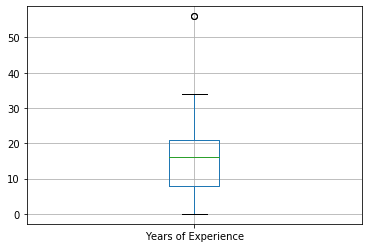

In [95]:
print("Resposta: c) 2 outliers globais, sendo um deles também um outlier contextual")
print()
print("Ambos são globais pois eles estão fora da maior parte dos dados globalmente, porém, um deles ainda é um dado errôneo, também classificando-o como outlier contextual, pois olhando o contexto de ano de nascimento, uma pessoa nascida em 1988 não pode ter 56 anos de experiência.")
df.boxplot(column=['Years of Experience'])
df[(df['Years of Experience'] < 0) | (df['Years of Experience'] >= 35)]

### Exercício 6)

Gere o gráfico de caixa do atributo 'Year of Birth' e depois selecione e imprima na tela todas as linhas em que o atributo 'Year of Birth' possui valores fora das barras de mínimo e máximo do gráfico de caixa.

Como interpretar as linhas retornadas e quais ações são mais indicadas, em termos de manter ou remover os dados supeitos?

a. a linha 22 possui outliers e dados errôneos, os quais devem ser removidos; a linha 67 possui outliers, mas são plausíveis e podem ser mantidos<br>
b. a linha 22 possui valores outliers, mas são plausíveis e podem ser mantidos; a linha 67 possui outliers e dados errôneos, os quais devem ser removidos<br>
c. a linha 67 e a linha 22 possuem valores outliers, mas não é recomendado removê-los<br>
d. a linha 22 e a linha 67 possuem outliers e dados errôneos, todos esses valores devem ser removidos<br>

Resposta: b) a linha 22 possui valores outliers, mas são plausíveis e podem ser mantidos; a linha 67 possui outliers e dados errôneos, os quais devem ser removidos

Neste caso, a linha 67 diz que o ano de nascimento é 2013, portanto, seria um enfermeiro com 7 anos de idade. É muito provável ser um dado errôneo, portanto, plausível de remoção.


,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
22,Ariel Almada,F,1930,Portugal,Christian,Lisbon,Nurse,56.0
67,Marshall Vargas,M,2013,Scotland,1,Edinburgh,Nurse,NaN


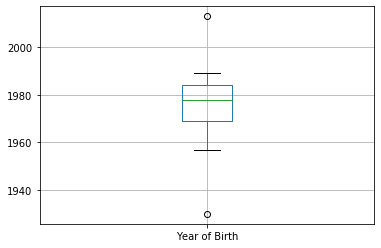

In [98]:
print("Resposta: b) a linha 22 possui valores outliers, mas são plausíveis e podem ser mantidos; a linha 67 possui outliers e dados errôneos, os quais devem ser removidos")
print()
print("Neste caso, a linha 67 diz que o ano de nascimento é 2013, portanto, seria um enfermeiro com 7 anos de idade. É muito provável ser um dado errôneo, portanto, plausível de remoção.")
df.boxplot(column=['Year of Birth'])
df[(df['Year of Birth'] <= 1955) | (df['Year of Birth'] >= 1990)]